1. Import the pandas library, aliased as `pd`.
2. Import the numpy library, aliased as `np`.
3. Import the pyplot module from the matplotlib library, aliased as `plt`.


    ### Choice of Linear Regression:
    Linear regression is a common and simple approach to modeling the relationship between a dependent variable and one or more independent variables. I have chosen it for this model due to it's simplicity, interpretability, and effectiveness in modeling linear relationships in data.


In [ ]:
import pandas as pd
import numpy as numpy
import matplotlib.pyplot as plt
from sklearn import linear_model

### Explanation:
Loading data from a CSV file named "homeprices.csv" into a pandas DataFrame named `df`. This dataset likely contains information about home prices, as suggested by the file name. By loading the data into a DataFrame, we can easily manipulate, analyze, and visualize the data using pandas and other Python libraries. This step is crucial for data analysis and modeling tasks, as it provides access to the dataset for further exploration and processing.


In [ ]:
df = pd.read_csv("/Users/jasonjoelpinto/Documents/GitHub/python-datascience-projects/007. homeprices/dataset/homeprices.csv")
df

### Explanation:

1. `%matplotlib inline`:
   - This line ensures that plots appear directly within the Jupyter Notebook, making visualization seamless and interactive.

2. `plt.xlabel('area in sqft')`:
   - Sets the label for the x-axis as "area in sqft", indicating the size of properties in square feet.

3. `plt.ylabel('price in euros (€)')`:
   - Sets the label for the y-axis as "price in euros (€)", denoting the price of properties in euros.

4. `plt.scatter(df.area, df.price, color='black')`:
   - Generates a scatter plot using property data from DataFrame `df`, where:
     - The x-axis represents property areas.
     - The y-axis represents property prices.
     - Each point on the plot represents a property, with black dots highlighting the data points.

### Summary:
These lines create a simple scatter plot to visualize the relationship between property areas and prices. It helps beginners understand how prices vary with property sizes, aiding in data exploration and pattern identification.


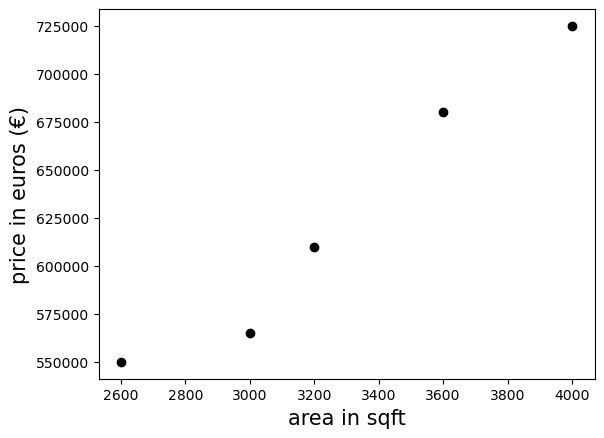

In [48]:
%matplotlib inline
plt.xlabel('area in sqft',fontsize=15)
plt.ylabel('price in euros (€)',fontsize=15)
plt.scatter(df.area,df.price, color='black')

### Explanation:

1. `reg = linear_model.LinearRegression()`:
   - This line creates a linear regression model object named `reg` using scikit-learn's `LinearRegression()` class.
   - Linear regression is a simple and widely-used technique for modeling the relationship between a dependent variable and one or more independent variables.
2. `reg.fit(df[['area']],df[['price']])`
   - This line I am fitting the data to the linear regression model so that it can train. So in this case I will have to pass two arguments. i.e `df.area` and `df.price`.


In [28]:
reg = linear_model.LinearRegression()
reg.fit(df[['area']],df[['price']])

LinearRegression()

### Explanation:

1. `reg.predict([[3300]])`:
   - This line predicts the price of a property with an area of 3300 square feet using the linear regression model `reg` that was previously created.
   - The `predict()` method takes an array-like object containing the features (in this case, the area of the property) and returns the predicted target variable (price) based on the fitted model.


In [33]:
reg.predict([[3300]])

/Users/jasonjoelpinto/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[628715.75342466]])

Now let us check the coefficient values i.e
- In `y = mx + b`
- When we pass `x,y` to the model, it will find the `m(slope/coefficient)` and `b(intercept)`.
- When we passed `3300` as `x` to the model. Using the `m` and `b` which it had found in the model. It predicts `y` for us. In this case it was `628715.75342466`.
- Now let's find that is m(slope/coefficient) and b intercept.

In [34]:
reg.coef_

array([[135.78767123]])

In [35]:
reg.intercept_

array([180616.43835616])

area x = 3300 
price y - ? price we need to findd

So the formula will be `y = mx + b`
m = reg.coef_
b = reg.intercept_
If we replace it will be `y = reg.coef_ * x + reg.intercept_`

In [38]:
x = 3300

print(reg.predict([[3300]]))

y = (reg.coef_ * x) + reg.intercept_
print(y)

[[628715.75342466]]
[[628715.75342466]]


/Users/jasonjoelpinto/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


It's exactly the same as our model predited. Yayy!!!

Now let try to predict the price of the area which we have in area.csv

In [39]:
df2 = pd.read_csv('/Users/jasonjoelpinto/Documents/GitHub/python-datascience-projects/007. homeprices/dataset/area.csv')
df2

,area
0,1000
1,150
2,2300
3,3540
4,4120
5,4560
6,5490
7,3460
8,4750
9,2300


In [44]:
reg.predict(df2[['area']])
# OR
reg.predict(df2)

array([[ 316404.10958904],
       [ 200984.5890411 ],
       [ 492928.08219178],
       [ 661304.79452055],
       [ 740061.64383562],
       [ 799808.21917808],
       [ 926090.75342466],
       [ 650441.78082192],
       [ 825607.87671233],
       [ 492928.08219178],
       [1402705.47945205],
       [1348390.4109589 ],
       [1144708.90410959]])

Now let's store the result in variable p
and then add it to 

In [45]:
p = reg.predict(df2)
df2['price'] = p
df2

,area,price
0,1000,3.164041e+05
1,150,2.009846e+05
2,2300,4.929281e+05
3,3540,6.613048e+05
4,4120,7.400616e+05
5,4560,7.998082e+05
6,5490,9.260908e+05
7,3460,6.504418e+05
8,4750,8.256079e+05
9,2300,4.929281e+05


Exporting the values to prediction.csv

In [46]:
df2.to_csv('/Users/jasonjoelpinto/Documents/GitHub/python-datascience-projects/007. homeprices/dataset/prediction.csv')


Now I want to plot the scatter plot, but additonally want to add the predition line it it

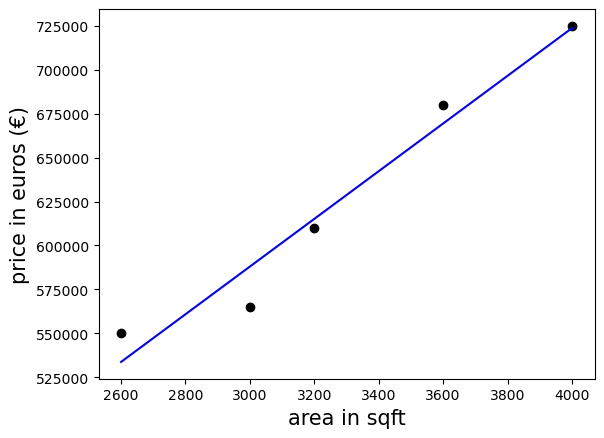

In [52]:
%matplotlib inline
plt.xlabel('area in sqft',fontsize=15)
plt.ylabel('price in euros (€)',fontsize=15)
plt.scatter(df.area,df.price, color='black')
plt.plot(df.area,reg.predict(df[['area']]),color='blue')